## IV. Directed search

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time
import json

from specify import (specify_levers, specify_scenario, default_scenario)

from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario, ScalarOutcome, Constraint)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging

from ema_workbench.em_framework.evaluators import BaseEvaluator
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.analysis import parcoords
from ema_workbench import save_results
from ema_workbench import load_results

ema_logging.log_to_stderr(ema_logging.INFO)
BaseEvaluator.reporting_frequency = 0.1
# ema_logging.log_to_stderr(ema_logging.DEBUG)

C:\Users\Mikhail\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Mikhail\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### 1. Define the problem and policy

In [2]:
# # 3 objectives P
# from problem_formulation import get_model_for_problem_formulation
# dike_model = get_model_for_problem_formulation(1)
# n_objectives = 3

# 8 objectives PF
from problem_formulation_new_version import get_model_for_problem_formulation
dike_model = get_model_for_problem_formulation(4)
n_objectives = 8

policy0 = Policy('policy_0', **specify_levers(0,0,0,0,0,0,0,0,0,0,0)) # DO NOTHING policy

minimize = ScalarOutcome.MINIMIZE
maximize = ScalarOutcome.MAXIMIZE

C:\Users\Mikhail\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
[MainProcess/INFO] model initialized


### 2. Run MORDM alogrithm

#### 2.1 Identify worst cases

We want to find what is the worst case scenario if we won't do anything.

In [3]:
# Load epsilons setted up durning Open Exploration
# 3 obj PF
# eps = pd.read_excel('epsilons_wcs_3obj.xlsx')

# # 8 obj PF
# eps = pd.read_excel('epsilons_wcs_8obj.xlsx')
# eps = eps[0].values.tolist()

In [4]:
# nfe = 1e4
# epsilons = eps
# convergence_metrics = [EpsilonProgress()]

# # Swtich to the worst case
# for outcome in dike_model.outcomes:
#     if outcome.kind == minimize:
#         outcome.kind = maximize
#     else:
#         outcome.kind = minimize

# start = time.time()
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results, convergence = evaluator.optimize(nfe=nfe, 
#                                               searchover='uncertainties',
#                                               epsilons=epsilons, 
#                                               convergence=convergence_metrics,
#                                               reference = policy0)
# end = time.time()

In [5]:
# print('Optimization time is ' + str(round((end - start)/60)) + ' mintues')
# print('Found ' + str(len(results)) + ' solutions' + '\n')

In [6]:
# # Show values
# results

#### Load results here!!!

In [8]:
# # Load results 3 obj PF
# with open(MORDM_worst_case_10000nfe_3obj) as data_file:
#     worst_case_values = json.loads(data_file.read())

# Load results 8 obj PF
with open('MORDM_worst_case_10000nfe_8obj') as data_file:
    worst_case_values = json.loads(data_file.read())
convergence = pd.read_excel('MORDM_worst_case_convergence_10000nfe_8obj.xlsx')
results = pd.read_excel('MORDM_worst_case_results_10000nfe_8obj.xlsx')

In [9]:
print('Found ' + str(len(results)) + ' solutions' + '\n')

Found 1 solutions



#### Check convergence

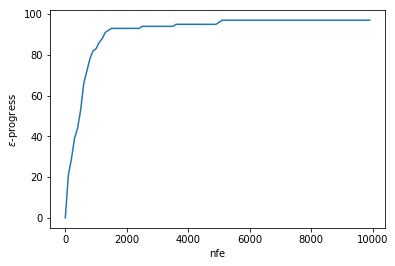

In [10]:
plt.plot(convergence.nfe, convergence.epsilon_progress)
plt.ylabel('$\epsilon$-progress')
plt.xlabel('nfe')
plt.show()

#### Preprocess / save / load results

In [11]:
# # Preprocess results
# worst_case_scenario = results.sort_values(by='Expected Number of Deaths',ascending=False)[(list(dike_model.uncertainties.keys()))].to_dict('records')
# for j in range(0, len(results)) : 
#     for i in range (1, 6) : 
#         s = 'A.' + str(i) + '_Brate'
#         worst_case_scenario[j][s] = worst_case_scenario[j][s].value
#     worst_case_scenario[j]['discount rate'] = worst_case_scenario[j]['discount rate'].value

In [12]:
# # Store worst case scenarios as a tuple
# worst_case_scenario_tup = ()
# for i in range(0, len(results)) :
#      worst_case_scenario_tup = worst_case_scenario_tup + (specify_scenario(reference_values=worst_case_scenario[i], dike_model=dike_model), )

In [13]:
# w_name = 'MORDM_worst_case_' + str(int(nfe)) + 'nfe' + '_' + str(n_objectives) + 'obj'
# c_name = 'MORDM_worst_case_convergence_' + str(int(nfe)) + 'nfe' + '_' + str(n_objectives) + 'obj' + '.xlsx'
# r_name = 'MORDM_worst_case_results_' + str(int(nfe)) + 'nfe' + '_' + str(n_objectives) + 'obj' + '.xlsx'

In [14]:
# # Save results
# with open(w_name, 'w') as fout:
#     json.dump(worst_case_scenario, fout)
# convergence.to_excel(c_name)
# results.to_excel(r_name)

In [15]:
# # Load results
# with open(w_name) as data_file:
#     worst_case_values = json.loads(data_file.read())
# convergence = pd.read_excel(c_name)
# results = pd.read_excel(r_name)

#### 2.2 Identify optimal policies under the worst case scenario

We want to find policies that will perform 'good' under the worst case scenario.

In [16]:
# # # Load worst case scenario 3 obj PF
# # with open(MORDM_worst_case_10000nfe_3obj) as data_file:
# #     worst_case_values = json.loads(data_file.read())
# # worst_case_scenario = specify_scenario(reference_values=worst_case_values[0], dike_model=dike_model) # Worst case scenario

# # Load worst case scenario 8 obj PF
# with open(MORDM_worst_case_10000nfe_8obj) as data_file:
#     worst_case_values = json.loads(data_file.read())
# worst_case_scenario = specify_scenario(reference_values=worst_case_values[0], dike_model=dike_model)

In [17]:
# Load epsilons setted up durning Open Exploration
# # 3 obj PF
# eps = pd.read_excel('epsilons_optim_3obj.xlsx')

# # 8 obj PF
# eps = pd.read_excel('epsilons_optim_8obj.xlsx')

#### Set up the constraitns for 8 obj PF

It was empirically found out that the alogrithm cannot find (fastly) a set of optimal solutions with 8 objectives without constraints.

In [18]:
# # Setting up the thresholds
# deaths_constr = 0.009
# rfr_constr = 1e6 * 350

In [19]:
# # Defining constraints
# constraints = [Constraint('Expected Number of Deaths Constraint', outcome_names='Expected Number of Deaths',
#                           function=lambda x:max(0, x-deaths_constr)),
#                 Constraint('RfR Total Costs Constraint', outcome_names='RfR Total Costs',
#                           function=lambda x:max(0, x-rfr_constr))]      

In [20]:
# epsilons = eps[0].values.tolist()
# nfe = 1e4
# convergence_metrics = [EpsilonProgress()]

# # # Switch to the best case 
# # for outcome in dike_model.outcomes:
# #     if outcome.kind == maximize:
# #         outcome.kind = minimize
# #     else:
# #         outcome.kind = maximize

# start = time.time()
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results, convergence = evaluator.optimize(nfe=nfe,
#                                               searchover='levers',
#                                               epsilons=epsilons,
#                                               convergence=convergence_metrics,
#                                               reference=worst_case_scenario,
#                                               constraints=constraints # Comment for 3 obj PF
#                                               )
# end = time.time()
# print('Optimization time is ' + str(round((end - start)/60)) + ' minutes')

#### Load results here!!!

In [21]:
convergence = pd.read_excel('MORDM_wcs_convergence_optimal_policy_10000nfe_8obj.xlsx')
results = pd.read_excel('MORDM_wcs_results_optimal_policy_10000nfe_8obj.xlsx')

In [22]:
print('Found ' + str(len(results)) + ' solutions' + '\n')

Found 196 solutions



In [23]:
# Check statistics
results.iloc[:,-n_objectives:].describe()

,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
count,196.000000,1.960000e+02,196.000000,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,0.008053,1.971173e+08,4632.324172,1.631102e+08,4.157436e+07,4.180986e+06,5.313449e+06,7.383850e+07
std,0.000511,4.250226e+07,390.780958,6.778313e+06,8.963592e-08,4.649426e+06,5.671513e+06,1.344539e-07
min,0.007169,1.212000e+08,3383.696635,1.481449e+08,4.157436e+07,0.000000e+00,0.000000e+00,7.383850e+07
25%,0.007600,1.519000e+08,4381.101974,1.582880e+08,4.157436e+07,6.777067e+05,1.497971e+06,7.383850e+07
50%,0.007977,2.058000e+08,4564.157679,1.631117e+08,4.157436e+07,2.655635e+06,3.629879e+06,7.383850e+07
75%,0.008493,2.365000e+08,4772.132716,1.680051e+08,4.157436e+07,6.516897e+06,7.630972e+06,7.383850e+07
max,0.008990,2.365000e+08,6282.164601,1.806380e+08,4.157436e+07,2.387085e+07,3.171355e+07,7.383850e+07


#### Check convergence

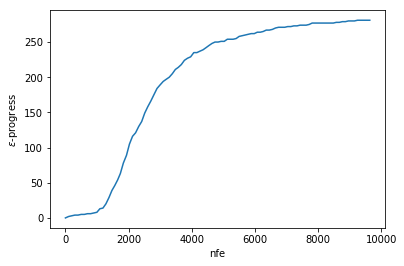

In [24]:
plt.plot(convergence.nfe, convergence.epsilon_progress)
plt.ylabel('$\epsilon$-progress')
plt.xlabel('nfe')
plt.show()

#### Save / load results

In [25]:
# wcs_c_name = 'MORDM_wcs_convergence_optimal_policy_' + str(int(nfe)) + 'nfe' + '_' + str(n_objectives) + 'obj' + '.xlsx'
# wcs_r_name = 'MORDM_wcs_results_optimal_policy_' + str(int(nfe)) + 'nfe' + '_' + str(n_objectives) + 'obj' + '.xlsx'

In [26]:
# convergence.to_excel(wcs_c_name)
# results.to_excel(wcs_r_name)

In [27]:
# results = pd.read_excel(wcs_c_name)
# convergence = pd.read_excel(wcs_r_name)

#### 2.3. Show optimization trade-offs

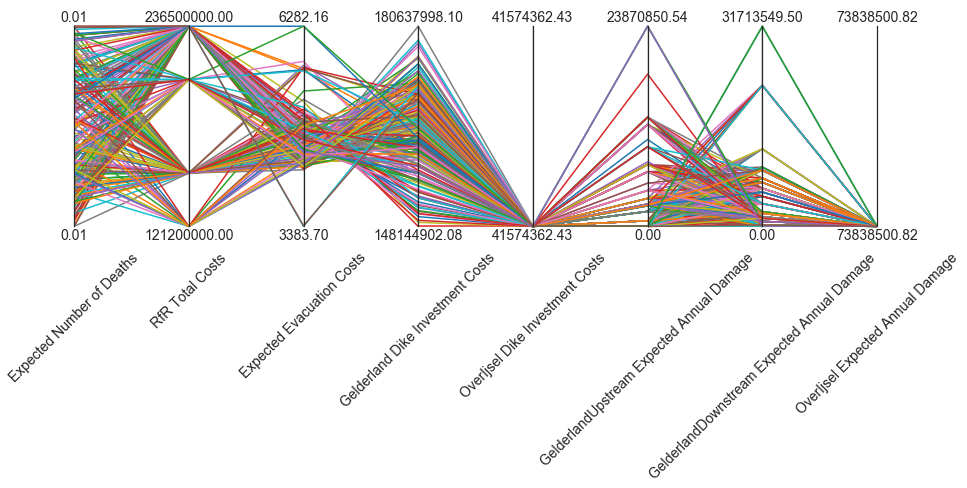

In [28]:
# 8 obj PF 
data = results.loc[:, [o.name for o in dike_model.outcomes]]
paraxes = parcoords.ParallelAxes(parcoords.get_limits(data), rot=45)
paraxes.plot(data)
fig = plt.gcf()
fig.set_size_inches(18.5, 10 * 3)
plt.show()

In [29]:
# # 3 objectives PF 
# data = results.loc[:, [o.name for o in dike_model.outcomes]]
# limits = parcoords.get_limits(data)
# paraxes = parcoords.ParallelAxes(limits)
# paraxes.plot(data)
# plt.show()

### 3. Re-evalute the policies

In [30]:
# 8 obj PF
# Slice the policies using new threshold
budget_constraint = 3.35 * 1e8
r = results.iloc[:,-n_objectives:]
s = results.loc[:, 'RfR Total Costs'].values + results.loc[:, 'Expected Evacuation Costs'].values + results.loc[:, 'Gelderland Dike Investment Costs'].values + results.loc[:, 'OverIjsel Dike Investment Costs'].values
s = pd.DataFrame(s)
s = s[s[0] < budget_constraint]
results.loc[s.index.values.tolist(),:].to_excel('MORDM_optimal_policies_8obj.xlsx')

In [31]:
results.loc[s.index.values.tolist(),:]

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
102,9,9,10,6,10,0,0,0,1,0,4,0.007916,121200000,5343.681530,1.714074e+08,4.157436e+07,2.655635e+06,6.048433e+06,7.383850e+07
106,9,8,10,6,10,0,0,0,1,0,3,0.008185,121200000,4699.650298,1.670195e+08,4.157436e+07,5.155547e+06,6.048433e+06,7.383850e+07
120,9,7,10,9,10,0,0,0,1,0,3,0.008467,121200000,4681.551912,1.659698e+08,4.157436e+07,1.036479e+07,1.520878e+06,7.383850e+07
134,10,7,10,10,10,0,0,0,1,0,3,0.008243,121200000,4622.786391,1.720796e+08,4.157436e+07,7.709155e+06,1.291632e+06,7.383850e+07
153,9,9,10,4,10,0,0,0,1,0,3,0.008706,121200000,5683.812675,1.695949e+08,4.157436e+07,2.655635e+06,2.235122e+07,7.383850e+07
164,9,9,10,5,10,0,0,0,1,0,3,0.008060,121200000,4771.775328,1.704760e+08,4.157436e+07,2.655635e+06,8.922603e+06,7.383850e+07
185,9,8,10,5,10,0,0,0,1,0,3,0.008329,121200000,4891.127172,1.660881e+08,4.157436e+07,5.155547e+06,8.922603e+06,7.383850e+07
191,10,8,10,5,10,0,0,0,1,0,3,0.008120,121200000,4844.572212,1.710400e+08,4.157436e+07,2.499913e+06,8.922603e+06,7.383850e+07


In [32]:
policies = results.loc[s.index.values.tolist(),:]
policies = policies.drop([o.name for o in dike_model.outcomes], axis=1).reset_index(drop=True)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

n_policies = len(policies)
# Show the policies
policies

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat
0,9,9,10,6,10,0,0,0,1,0,4
1,9,8,10,6,10,0,0,0,1,0,3
2,9,7,10,9,10,0,0,0,1,0,3
3,10,7,10,10,10,0,0,0,1,0,3
4,9,9,10,4,10,0,0,0,1,0,3
5,9,9,10,5,10,0,0,0,1,0,3
6,9,8,10,5,10,0,0,0,1,0,3
7,10,8,10,5,10,0,0,0,1,0,3


In [33]:
# # 3 objectives PF
# # Introduce a treshold
# logical = results['Expected Number of Deaths'] < 0.009
# print('Satisfactory policaies found', np.sum(logical))

In [34]:
# # Select these policies
# policies = results[logical]
# policies = policies.drop([o.name for o in dike_model.outcomes], axis=1).reset_index(drop=True)
# policies_to_evaluate = []

# for i, policy in policies.iterrows():
#     policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

# n_policies = len(policies)
# # Show the policies
# policies

In [35]:
# # Save these policies
# policies.to_excel('MORDM_optimal_polices_wcs.xlsx')

In [36]:
# # Run simulation
# start = time.time()
# n_scenarios = 3000
# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(n_scenarios,
#                                             policies_to_evaluate)
# end = time.time()
# print('Simulation time is ' + str(round((end - start)/60)) + ' mintues')   

#### Save / load results

In [37]:
# wcs_re_eval_r_name = 'MORDM_wcs_results_re_evaluate' + str(int(n_scenarios)) + 'scenarios' + '_' + str(n_objectives) + 'obj_' + str(n_policies) + 'policies'

#### Load results here!!!

In [38]:
# save_results(results, wcs_re_eval_r_name)
results = load_results('MORDM_wcs_results_re_evaluate3000scenarios_8obj_8policies')

[MainProcess/INFO] results loaded succesfully from C:\Users\Mikhail\Python projects\Model-based decision-making\final assignment\MORDM_wcs_results_re_evaluate3000scenarios_8obj_8policies


#### Preprocess results

In [39]:
experiments, outcomes = results
n_scenarios = pd.DataFrame(experiments).shape[0] / n_policies
policies = np.empty([len(experiments), 1])
k = 0
l = n_scenarios
for i in range (len(experiments)) : 
    policies[i] = k
    if (i == l - 1) : 
        k = k + 1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

In [40]:
pd.DataFrame(outcomes).describe()

,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
count,24000.000000,24000.0,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04
mean,0.000162,121200000.0,83.833608,1.692094e+08,4.157436e+07,8.275081e+05,6.436660e+05,6.749594e+04
std,0.001491,0.0,381.047416,2.324012e+06,7.122903e-06,1.905030e+07,3.032175e+06,8.115307e+05
min,0.000000,121200000.0,0.000000,1.659698e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,121200000.0,0.000000,1.667867e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,121200000.0,0.000000,1.700354e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,121200000.0,0.000000,1.711319e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
max,0.078644,121200000.0,12965.760405,1.720796e+08,4.157436e+07,1.122653e+09,5.351657e+07,2.282129e+07


#### Visualize results

In [41]:
# # 3 obj PF
# g = sns.PairGrid(data, hue='policy', palette='RdBu_r')
# g.map(plt.scatter, alpha=0.8)
# g.add_legend();

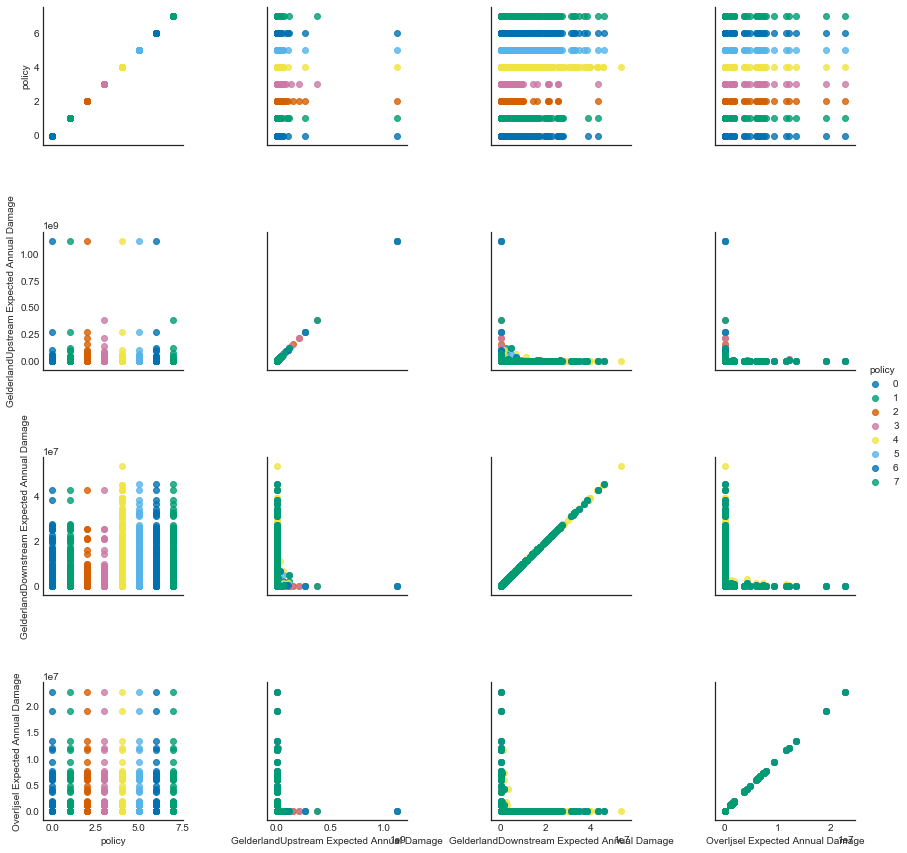

In [42]:
# Let's damage
g = sns.PairGrid(data, hue='policy', palette='colorblind', vars= ['policy', 
                                                                  'GelderlandUpstream Expected Annual Damage', 
                                                                 'GelderlandDownstream Expected Annual Damage', 
                                                                 'OverIjsel Expected Annual Damage'], size = 3)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

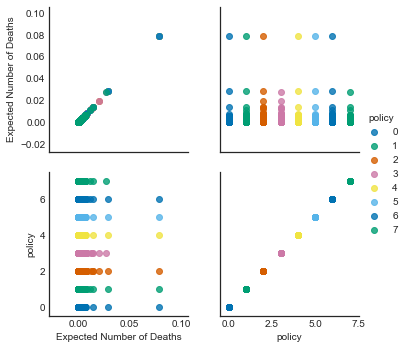

In [43]:
# Expected Number of Deaths
g = sns.PairGrid(data, hue='policy', palette='colorblind', vars = ['Expected Number of Deaths', 'policy'])
g.map(plt.scatter, alpha=0.8)
g.add_legend();

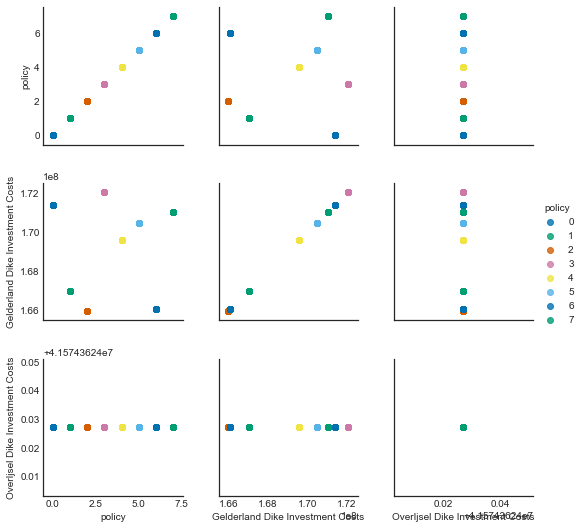

In [44]:
# Dike costs
g = sns.PairGrid(data, hue='policy', palette='colorblind', vars= ['policy', 
                                                                  'Gelderland Dike Investment Costs', 
                                                                 'OverIjsel Dike Investment Costs'])
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### 4. Measure robusntess 

#### 4.1 Signal-to-noise

In [45]:
def s_to_n(data) : # ,direction):
    mean = np.mean(data)
    std = np.std(data)
    
#     if direction==ScalarOutcome.MAXIMIZE:
#         return mean/std
#     else:
    return mean / std

In [46]:
experiments, outcomes = results
overall_scores = {}

for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy']==policy
    
    for outcome in dike_model.outcomes :
        value  = outcomes[outcome.name][logical]
        sn_ratio = s_to_n(value)
        scores[outcome.name] = sn_ratio
    overall_scores[policy] = scores

scores = pd.DataFrame.from_dict(overall_scores).T

C:\Users\Mikhail\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [47]:
# Seems that some values are constant
pd.DataFrame(outcomes).describe()

,Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,Gelderland Dike Investment Costs,OverIjsel Dike Investment Costs,GelderlandUpstream Expected Annual Damage,GelderlandDownstream Expected Annual Damage,OverIjsel Expected Annual Damage
count,24000.000000,24000.0,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04
mean,0.000162,121200000.0,83.833608,1.692094e+08,4.157436e+07,8.275081e+05,6.436660e+05,6.749594e+04
std,0.001491,0.0,381.047416,2.324012e+06,7.122903e-06,1.905030e+07,3.032175e+06,8.115307e+05
min,0.000000,121200000.0,0.000000,1.659698e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,121200000.0,0.000000,1.667867e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,121200000.0,0.000000,1.700354e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,121200000.0,0.000000,1.711319e+08,4.157436e+07,0.000000e+00,0.000000e+00,0.000000e+00
max,0.078644,121200000.0,12965.760405,1.720796e+08,4.157436e+07,1.122653e+09,5.351657e+07,2.282129e+07


In [48]:
# After selecting only unique ones
df = pd.DataFrame(outcomes)
df.loc[:, (df != df.iloc[0]).any()] .columns

Index(['Expected Number of Deaths', 'Expected Evacuation Costs',
       'Gelderland Dike Investment Costs',
       'GelderlandUpstream Expected Annual Damage',
       'GelderlandDownstream Expected Annual Damage',
       'OverIjsel Expected Annual Damage'],
      dtype='object')

In [49]:
scores = scores.replace([np.inf, -np.inf], df['Gelderland Dike Investment Costs'].max())

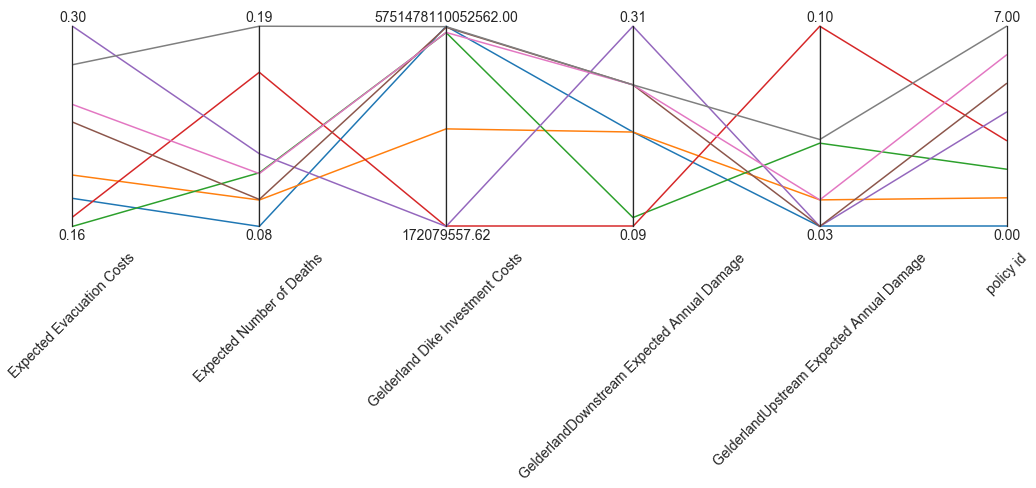

In [50]:
data = scores.drop(['RfR Total Costs', 'OverIjsel Dike Investment Costs', 'OverIjsel Expected Annual Damage'], axis=1)
data['policy id'] = data.index.astype('float64')
paraxes = parcoords.ParallelAxes(parcoords.get_limits(data), rot=45)
paraxes.plot(data)
fig = plt.gcf()
fig.set_size_inches(18.5, 10 * 3)
plt.show()

In [51]:
# # 3 obj PF
# data = scores

# limits = parcoords.get_limits(data)
# paraxes = parcoords.ParallelAxes(limits)
# paraxes.plot(data)
# plt.show()

#### 4.2 Maximum regret

In [52]:
def calculate_regret(data, best) : 
    return np.abs(best-data)

In [53]:
experiments, outcomes = results

regret = {}
max_regret = {}
for outcome in dike_model.outcomes:
    policy_column = experiments['policy']
    data = pd.DataFrame({outcome.name: outcomes[outcome.name], 
                         "policy":experiments['policy'],
                         "scenario_id":experiments['scenario_id']})
    
    data = data.pivot(index='scenario_id', columns='policy')
    data.columns = data.columns.get_level_values(1)
    outcome_regret = (data.max(axis=1)[:, np.newaxis] - data).abs()
    regret[outcome.name] = regret
    max_regret[outcome.name] = outcome_regret.max()

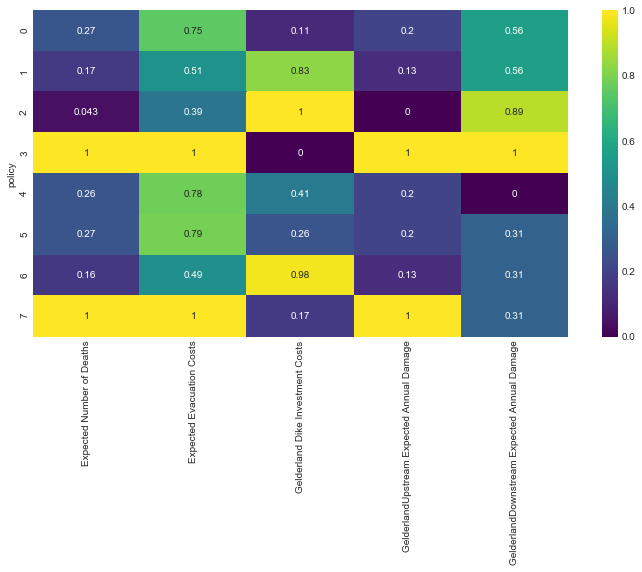

In [54]:
max_regret = pd.DataFrame(max_regret)
max_regret = max_regret.drop(['RfR Total Costs', 'OverIjsel Dike Investment Costs', 'OverIjsel Expected Annual Damage'], axis=1)
sns.heatmap(max_regret/max_regret.max(), cmap='viridis', annot=True)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

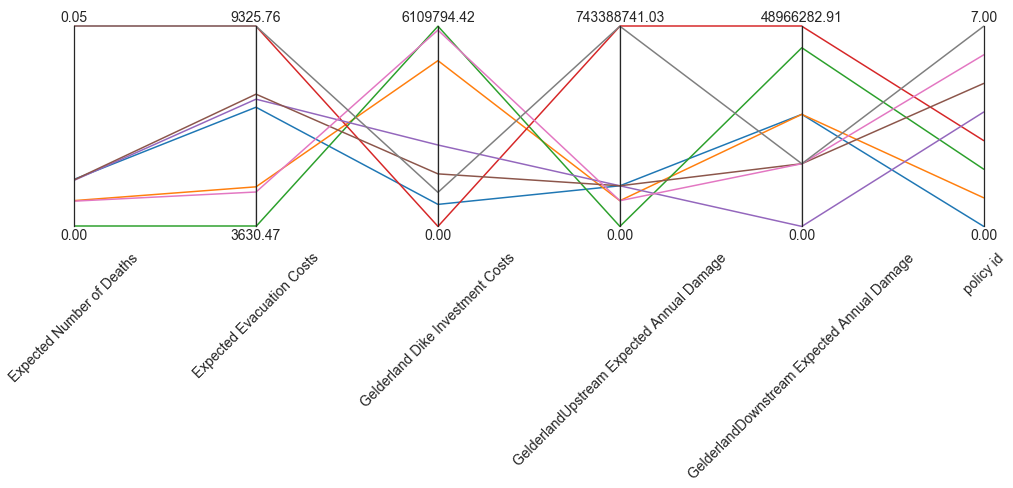

In [55]:
data = max_regret
data['policy id'] = data.index.astype('float64')
paraxes = parcoords.ParallelAxes(parcoords.get_limits(data), rot=45)
paraxes.plot(data)
fig = plt.gcf()
fig.set_size_inches(18.5, 10 * 3)
plt.show()